# Data Visualization - Relationship

## Goal
- Memperkenalkan cara untuk memvisualisasikan hubungan (relationship) antar data dengan python.

## Referensi
- https://www.tapclicks.com/blog/data-visualization-types

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns

pyo.init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Relationship between two variables

<Axes: xlabel='total_bill', ylabel='tip'>

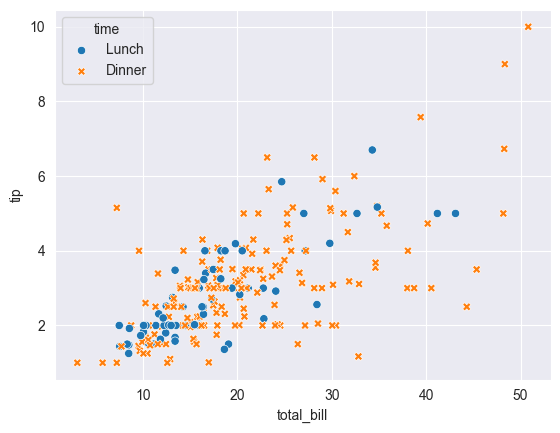

In [4]:
sns.set_style("darkgrid")
sns.scatterplot(
    data=df, 
    x='total_bill', 
    y='tip',
    hue='time',
    style="time"
)

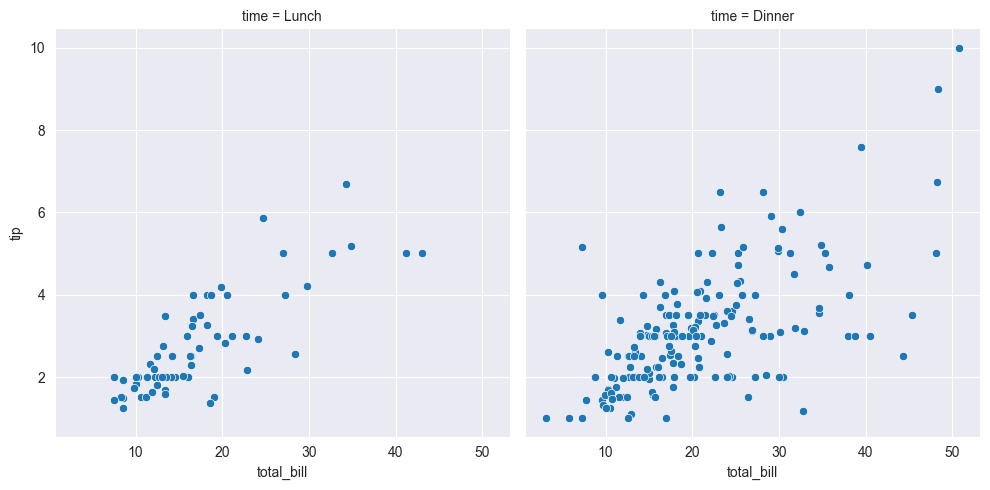

In [5]:
sns.relplot(
    data=df, 
    x="total_bill", 
    y="tip",
    col="time",
    kind="scatter"
)

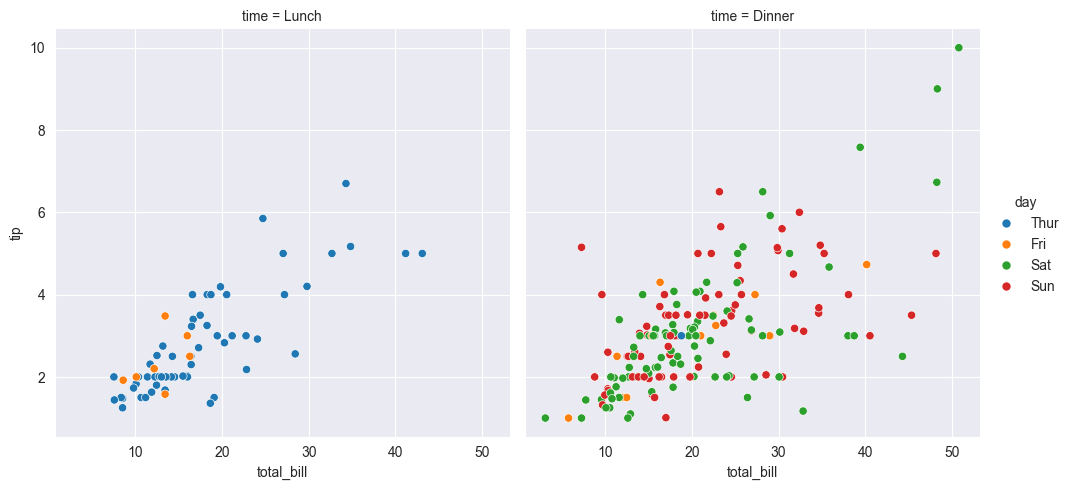

In [6]:
sns.relplot(
    data=df, 
    x="total_bill", 
    y="tip",
    col="time",
    kind="scatter",
    hue="day",
)

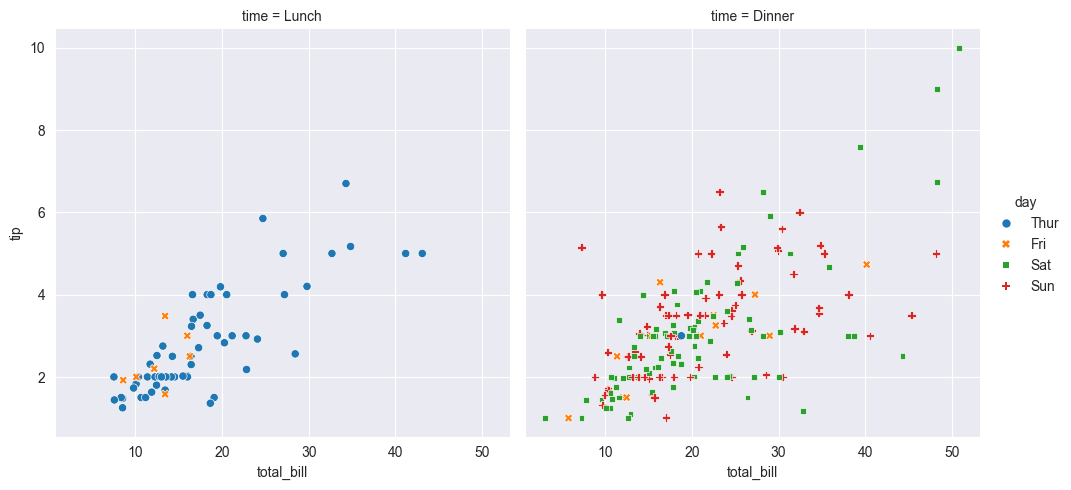

In [7]:
sns.relplot(
    data=df, 
    x="total_bill", 
    y="tip",
    col="time",
    kind="scatter",
    hue="day",
    style="day"
)

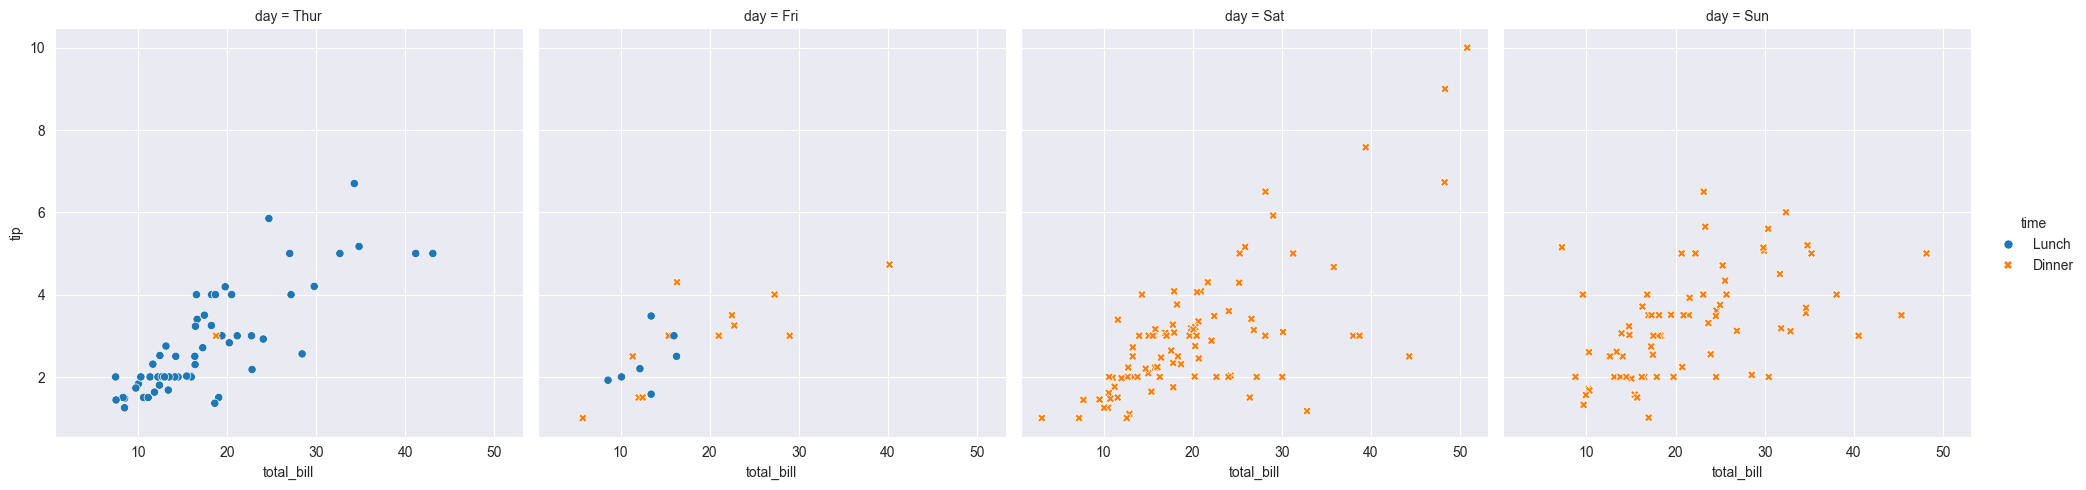

In [8]:
sns.relplot(
    data=df, 
    x="total_bill", 
    y="tip",
    col="day",
    kind="scatter",
    hue="time",
    style="time"
)

In [9]:
fig = px.scatter(
    data_frame=df.reset_index(),
    x="total_bill", 
    y="tip",
    color="time", 
    symbol="time", 
    facet_col="day", 
    custom_data=['index', 'time', 'day'])
fig.show()

In [10]:
fig = px.scatter(
    data_frame=df.reset_index(),
    x="total_bill", 
    y="tip",
    color="time", 
    symbol="time", 
    facet_col="day", 
    custom_data=['index', 'time', 'day'])
fig.update_traces(
    hovertemplate="<br>".join([
        "id: %{customdata[0]}",
        "bill: %{x}",
        "tip: %{y}",
        "time: %{customdata[1]}",
        "day: %{customdata[2]}",
    ])
)
fig.show()

In [11]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with Tip dataset'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by tip:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=10, step=1,
        marks={0: '0', 10: '10'},
        value=[0, 10]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = sns.load_dataset('tips').reset_index()
    low, high = slider_range
    mask = (df['tip'] > low) & (df['tip'] < high)
    fig = px.scatter(
        data_frame=df[mask],
        x="total_bill", 
        y="tip",
        color="time", 
        symbol="time", 
        facet_col="day", 
        custom_data=['index', 'time', 'day'])
    fig.update_traces(
        hovertemplate="<br>".join([
            "id: %{customdata[0]}",
            "bill: %{x}",
            "tip: %{y}",
            "time: %{customdata[1]}",
            "day: %{customdata[2]}",
        ])
    )
    return fig


app.run_server(debug=True)

### 2. Relationship between three variables

In [12]:
df = sns.load_dataset('iris')

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


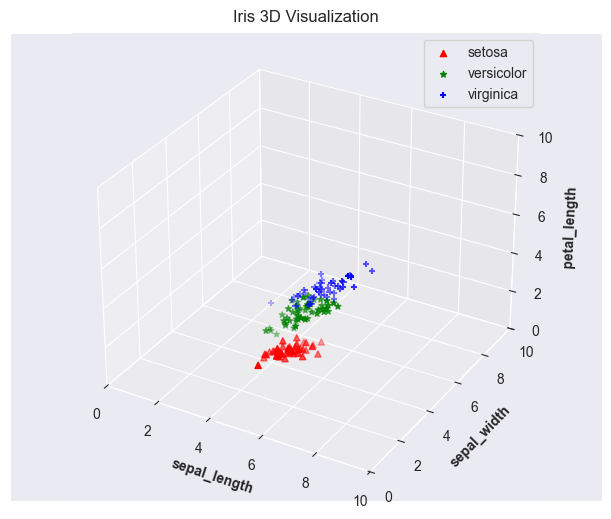

In [14]:
# fig = plt.figure(figsize=(8,5))
# fig.set_figheight(15)
# fig.set_figwidth(15)
fig, ax = plt.subplots(1, 1, figsize=(6, 5), layout='constrained', clear=True)
plt.xticks([])
plt.yticks([])
plt.suptitle('Iris 3D Visualization')
ax = fig.add_subplot(projection='3d')
dict_ = {
    'setosa' : {'color': 'r', 'marker': '^'},
    'versicolor' : {'color': 'g', 'marker': '*'},
    'virginica' : {'color': 'b', 'marker': '+'}
}
for key,val in dict_.items():
    df_tmp = df[df['species'] == key]
    ax.scatter(
        df_tmp['sepal_length'], 
        df_tmp['sepal_width'], 
        df_tmp['petal_length'], 
        marker=val['marker'],
        color=val['color'],
        label=key,
    )
ax.set_xlabel('sepal_length', fontweight ='bold')
ax.set_ylabel('sepal_width', fontweight ='bold')
ax.set_zlabel('petal_length', fontweight ='bold')
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_zlim([0,10])
ax.legend(loc='upper right')
plt.show()

In [16]:
fig = px.scatter_3d(
    df, 
    x='sepal_width', 
    y='sepal_length', 
    z='petal_length',
    color='species', 
    symbol='species',
    opacity=0.7)
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=10, range=[0,10],),
        yaxis = dict(nticks=10, range=[0,10],),
        zaxis = dict(nticks=10, range=[0,10],),),
    autosize=False,
    width=600,
    height=500
    )
fig.show()